ここではキノコがが有毒か否かを判別するシステムを構築する

利用するデータセット：UCI機械学習レポジトリが提供するキノコのデータセット

データセットには61069種のキノコのデータセットがあり、それぞれ食用（e）と有毒（p）に分けられている。


以下にデータセットから与えられるキノコの特徴量を記述する。

cap-diameter：傘の直径

cap-shape：傘の形状(鐘型（B）、円錐（C）、凸（x）、フラット（F）沈んだ形（S）、球型（P）)

cap-surface：キノコの表面（繊維状（I）、溝（G）、鱗状（Y）、滑らか（S）、光沢（H）、革状（L）、絹状（K）、粘着性（T）、しわ（W）、肉質（E））

cap-color：キャップの色（茶色（N）、バフ（B）、灰色（G）、緑（R）、ピンク（P）、紫（U）、赤（E）、白（W）、黄色（Y）、青（L）、オレンジ（O））


データセットの引用先：https://archive.ics.uci.edu/ml/datasets/Mushroom

必要なモジュールのインポート

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


データの読み込み

※ここで読み込むデータの区切り文字などの形式にも注意する

In [3]:
#今回利用するデータは区切り文字が";"であるためsepに設定する
df = pd.read_csv('secondary_data.csv',sep=";")

print(df)
print(df.shape)

      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN  

入力と出力の分割

In [4]:
#入力(特徴量)と出力(目的変数)の分割
X = df.iloc[:,1:5]
le = LabelEncoder()
#ラベルエンコーディングへの変換

X['cap-shape'] = le.fit_transform(df['cap-shape'])
X['cap-surface'] = le.fit_transform(df['cap-surface'])
X['cap-color'] = le.fit_transform(df['cap-color'])
X = (X - X.mean())/X.std()

y = df['class']
y = pd.get_dummies(y)
print(y)

       e  p
0      0  1
1      0  1
2      0  1
3      0  1
4      0  1
...   .. ..
61064  0  1
61065  0  1
61066  0  1
61067  0  1
61068  0  1

[61069 rows x 2 columns]


データの分割

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42748, 4) (18321, 4) (42748, 2) (18321, 2)


モデルの定義とコンパイル

MLP(多層パーセプトロン)の定義

In [6]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(y_train.shape[1], activation='softmax')
])

lr = None

model.compile(optimizer=keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

データの学習

In [13]:
epochs = 100
batch_size = 128
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, )

Epoch 1/100
334/334 - 1s - loss: 0.2250 - accuracy: 0.8906 - val_loss: 0.2218 - val_accuracy: 0.8939 - 1s/epoch - 3ms/step
Epoch 2/100
334/334 - 1s - loss: 0.2240 - accuracy: 0.8923 - val_loss: 0.2204 - val_accuracy: 0.8942 - 960ms/epoch - 3ms/step
Epoch 3/100
334/334 - 1s - loss: 0.2243 - accuracy: 0.8922 - val_loss: 0.2227 - val_accuracy: 0.8924 - 981ms/epoch - 3ms/step
Epoch 4/100
334/334 - 1s - loss: 0.2240 - accuracy: 0.8916 - val_loss: 0.2242 - val_accuracy: 0.8907 - 936ms/epoch - 3ms/step
Epoch 5/100
334/334 - 1s - loss: 0.2234 - accuracy: 0.8908 - val_loss: 0.2227 - val_accuracy: 0.8928 - 956ms/epoch - 3ms/step
Epoch 6/100
334/334 - 1s - loss: 0.2242 - accuracy: 0.8922 - val_loss: 0.2241 - val_accuracy: 0.8926 - 999ms/epoch - 3ms/step
Epoch 7/100
334/334 - 1s - loss: 0.2254 - accuracy: 0.8923 - val_loss: 0.2215 - val_accuracy: 0.8921 - 1s/epoch - 3ms/step
Epoch 8/100
334/334 - 1s - loss: 0.2224 - accuracy: 0.8928 - val_loss: 0.2222 - val_accuracy: 0.8923 - 1s/epoch - 3ms/step
E

学習過程の可視化

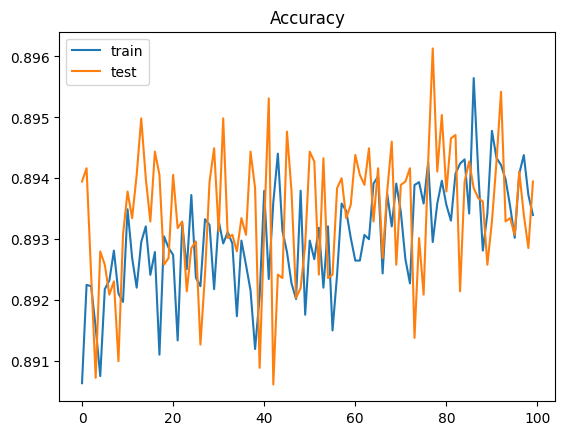

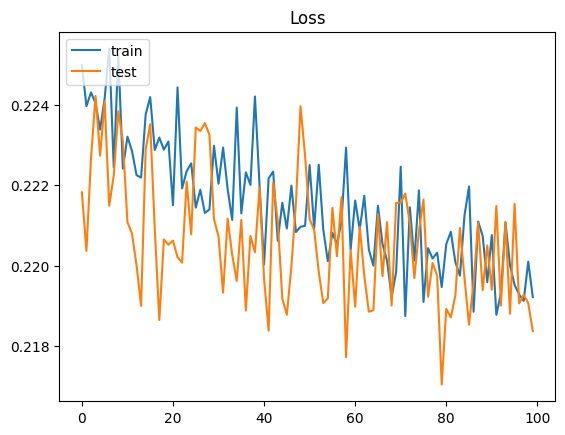

In [16]:
#正解率の推移
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

#ロスの推移
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [14]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)
print('\nTest accuracy:',test_acc)

573/573 - 1s - loss: 0.2184 - accuracy: 0.8939 - 1s/epoch - 2ms/step
¥nTest accuracy: 0.8939468264579773


In [17]:
y_pred = model.predict(X_test)
#y_predが0.5より大きい場合は1を返し、そうでないときは0を返す
y_pred = np.where(y_pred > 0.5,1,0)
print(y_pred)

573/573 [==============================] - 1s 1ms/step
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [18]:
model.save('mushroom_model_mlp.h5')